# **TASK- 4 SALES PREDICTION USING PYTHON**

Import necessary libreries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data=pd.read_csv("/content/advertising.csv")
df=pd.DataFrame(data)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### DATA PREPROCESSING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


*All the variables are floats*

In [9]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


*The dataset not contan any null values*

### EXPLORATORY DATA ANALYSIS

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### HEATMAP SHOWING THE CORRELATION BETWEEN THE VARIABLES

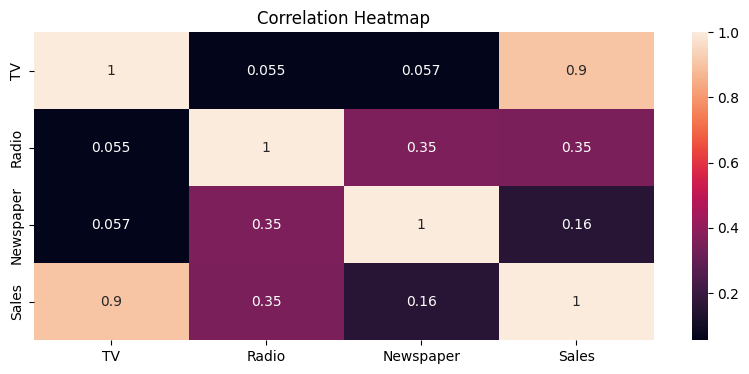

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

### SCATTERPLOT SHOWING THE RELATIONSHIP BETWEEN SALES AND OTHER VARIABLES

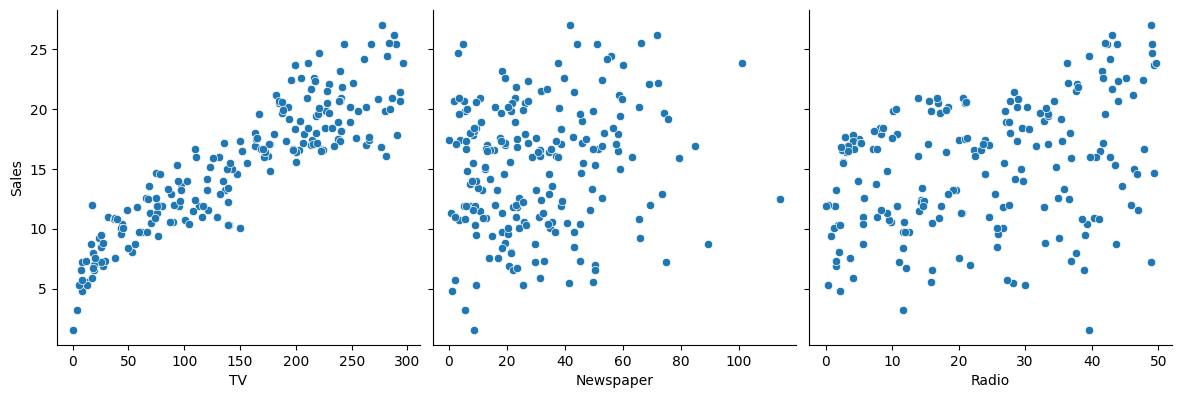

In [32]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

### MODEL SELECTION

In [13]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

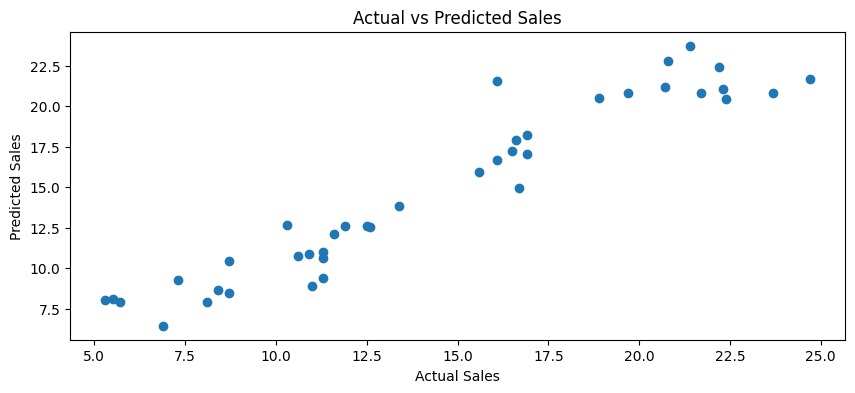

In [31]:
plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Root Mean Squared Error: 1.7052146229349223
R-squared Score: 0.9059011844150826
Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127


* *On average, the predicted sales values deviate from the actual values by approximately 1.71 units.*

* *The model explains 90.59% of the variance in sales based on TV, Radio, and Newspaper advertising budgets.*

*

1.  *TV: 0.0545 Sales increase by 0.0545 units (holding other variables constant).*

2. *Radio: 0.1009 Sales increase by 0.1009 units.*

3. *Newspaper: 0.0043  Sales increase by only 0.0043 units.*



### CONCLUSION

1. TV and Radio are strong drivers of sales, so businesses should prioritize spending in these areas.
2.  Newspaper advertising has little impact, meaning its budget could be reallocated to more effective channels.
3. The model is highly accurate (90.59% R²), meaning businesses can rely on it for future sales predictions.